<h1><center>Hierarchical Clustering</center></h1>

Добро пожаловать в лабораторную работу иерархической кластеризации с Python с использованием пакетов Scipy и Scikit-learn.

<h1 id="hierarchical_agglomerative">Иерархическая кластеризация - агломерация</h1>

Мы рассмотрим метод кластеризации, который представляет собой <b> агломеративную иерархическую кластеризацию </b>. Помните, что агломерация - это подход снизу вверх. <br> <br>
В этой лабораторной работе мы рассмотрим агломерационную кластеризацию, которая более популярна, чем разделительная кластеризация. <br> <br>
Мы также будем использовать полное связывание Complete Linkage в качестве критериев Linkage. <br>
<b> <i> ПРИМЕЧАНИЕ. Вы также можете попробовать использовать среднее связывание Average Linkage везде, где будет использоваться полное связывание, чтобы увидеть разницу! </i> </b>

In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

<hr>
<h3 id = "generation_data"> Генерация случайных данных </h3>
Мы будем генерировать набор данных, используя класс <b> make_blobs </b>. <br> <br>
Введите эти параметры в make_blobs:
<UL>
     <li> <b> n_samples </b>: Общее количество точек, поровну разделенных между кластерами. </li>
     <ul> <li> Выберите число от 10 до 1500 </li> </ul>
     <li> <b> centers </b>: Количество создаваемых центров или фиксированные местоположения центров. </li>
     <ul> <li> Выберите массивы координат x, y для генерации центров (например, centers = [[1,1], [2,5]]) </li> </ul>
     <li> <b> cluster_std </b>: Стандартное отклонение кластеров. Чем больше число, тем дальше друг от друга кластеры </li>
     <ul> <li> Выберите число от 0,5 до 1,5 </li> </ul>
</ul> <br>
Сохранить результат в <b>X1</b> и <b>y1</b>.

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

График рассеяния случайно сгенерированных данных

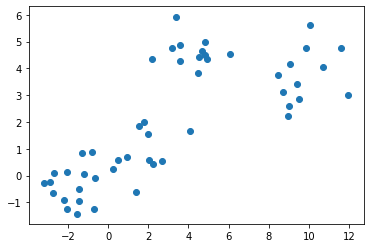

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

<hr>
<h3 id="agglomerative_clustering">Агломерационная кластеризация</h3>
Мы начнем с кластеризации случайных точек данных, которые мы только что создали.

Класс <b> агломеративная кластеризация Agglomerative Clustering</b> потребует два ввода:
<ul>
     <li> <b> n_clusters </b>: количество формируемых кластеров, а также количество центроидов, которые нужно сформировать. </li>
     <ul> <li> Значение будет равно: 4 </li> </ul>
     <li> <b> linkage </b>: Какой критерий связывания использовать. Критерий связывания определяет, какое расстояние использовать между наборами наблюдений. Алгоритм объединит пары кластеров, которые минимизируют этот критерий. </li>
     <ul>
         <li> Значение будет равно: 'complete' </li>
         <li> <b> Примечание </b>. Рекомендуется также попробовать все со значением 'average' </li>
     </ul>
</ul> <br>
Сохраните результат в переменную с именем <b> agglom </b>

In [4]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

Установите модель с <b> X2 </b> и <b> y2 </b> из сгенерированных выше данных.

In [5]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func='deprecated')

Запустите следующий код, чтобы показать кластеризацию! <br>
Не забудьте прочитать код и комментарии, чтобы лучше понять, как работает построение графиков.

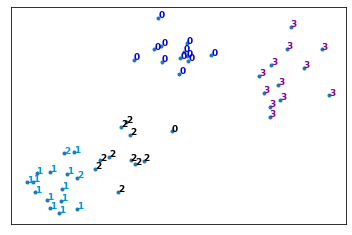

In [6]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()


<h3 id = "dendrogram"> Дендрограмма, связанная с агломеративной иерархической кластеризацией </h3>
Помните, что <b> матрица расстояний </b> содержит <b> расстояние от каждой точки до каждой другой точки набора данных </b>. <br>
Используйте функцию <b> distance_matrix, </b>, которая требует <b> двух входов </b>. Используйте матрицу элементов, <b> X2 </b> в качестве обоих входов и сохраните матрицу расстояний в переменную с именем <b> dist_matrix </b> <br> <br>
Помните, что значения расстояния симметричны, с диагональю 0. Это один из способов убедиться, что ваша матрица верна. <br> (распечатайте dist_matrix, чтобы убедиться, что это правильно)

In [7]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.83475318 0.84274085 ... 0.19326697 0.41011483 1.05536204]
 [0.83475318 0.         0.36022253 ... 0.71375973 0.42632548 0.38431624]
 [0.84274085 0.36022253 0.         ... 0.66602    0.48315478 0.23103482]
 ...
 [0.19326697 0.71375973 0.66602    ... 0.         0.29667079 0.88670709]
 [0.41011483 0.42632548 0.48315478 ... 0.29667079 0.         0.66947122]
 [1.05536204 0.38431624 0.23103482 ... 0.88670709 0.66947122 0.        ]]


Используя класс <b> linkage </b> из иерархии, передайте параметры:
<ul>
     <li> Матрица расстояний </li>
     <li> 'complete' для полной связи </li>
</ul> <br>
Сохраните результат в переменную с именем <b> Z </b>

In [10]:
Z = hierarchy.linkage(dist_matrix, 'complete')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Иерархическая кластеризация обычно визуализируется в виде дендрограммы, как показано в следующей ячейке. Каждое слияние представлено горизонтальной линией. Y-координата горизонтальной линии - это сходство двух объединенных кластеров.
Перемещаясь вверх от нижнего слоя к верхнему узлу, дендрограмма позволяет нам реконструировать историю слияний, которые привели к изображенной кластеризации.

Далее мы сохраним дендрограмму в переменную с именем <b> dendro </b>. При этом дендрограмма также будет отображаться.
Используя класс <b> dendrogram </b> из иерархии, передайте параметр:
<ul> <li> Z </li> </ul>

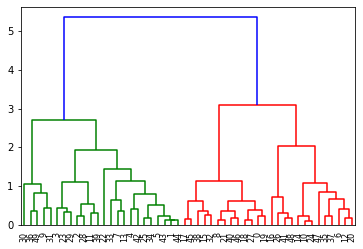

In [11]:
dendro = hierarchy.dendrogram(Z)

## Практика
Мы использовали связь __complete__, измените ее на связь __average__, чтобы увидеть, как меняется дендограмма.

In [ ]:
# write your code here



Дважды щелкните __здесь__ чтобы увидеть решение.

<!-- Your answer is below:
    
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

-->

<hr>
<h1 id="clustering_vehicle_dataset">Кластеризация по набору данных транспортных средств</h1>

Представьте, что производитель автомобилей разработал прототипы для нового автомобиля. Прежде чем вводить новую модель в свой ассортимент, производитель хочет определить, какие существующие на рынке транспортные средства больше всего похожи на прототипы, то есть, как транспортные средства можно сгруппировать, какая группа наиболее похожа на модель и, следовательно, с какими моделями они будут конкурировать.

Наша цель здесь, чтобы использовать методы кластеризации, чтобы найти наиболее характерные группы транспортных средств. Это поможет производителям принять решение о поставке новых моделей.

## Прочитаем данные
давайте прочитаем набор данных, чтобы увидеть, какие характеристики определил производитель в отношении существующих моделей.

In [12]:
filename = 'cars_clus.csv'

#Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (159, 16)


manufact    model   sales  resale   type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919  16.360  0.000  21.500    1.800  140.000  101.200   
1    Acura       TL  39.384  19.875  0.000  28.400    3.200  225.000  108.100   
2    Acura       CL  14.114  18.225  0.000  $null$    3.200  225.000  106.900   
3    Acura       RL   8.588  29.725  0.000  42.000    3.500  210.000  114.600   
4     Audi       A4  20.397  22.255  0.000  23.990    1.800  150.000  102.600   

    width   length curb_wgt fuel_cap     mpg lnsales  partition  
0  67.300  172.400    2.639   13.200  28.000   2.828        0.0  
1  70.300  192.900    3.517   17.200  25.000   3.673        0.0  
2  70.600  192.000    3.470   17.200  26.000   2.647        0.0  
3  71.400  196.600    3.850   18.000  22.000   2.150        0.0  
4  68.200  178.000    2.998   16.400  27.000   3.015        0.0

Наборы характеристик включают в себя цену в тысячах (цена), объем двигателя (engine_s), мощность (лошадиная сила), колесная база (wheelbas), ширина, длина, масса (curb_wgt), объем топлива (fuel_cap) и расход топлива (миль на галлон).

<h2 id="data_cleaning">Очистка данных</h2>
давайте очистим набор данных, отбросив строки с нулевым значением:

In [13]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0  
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0  
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0  
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0  
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0

### Выбор характеристик
Давайте выберем наш набор характеристик:

In [14]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

### Нормализация
Теперь мы можем нормализовать набор характеристик. __MinMaxScaler__ преобразует объекты, масштабируя каждый объект до заданного диапазона. Это по умолчанию (0, 1). То есть этот оценщик масштабирует и переводит каждый признак индивидуально, так что он находится между нулем и единицей.

In [15]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

<h2 id="clustering_using_scipy">Кластеризация с использованием Scipy</h2>
В этой части мы используем пакет Scipy для кластеризации набора данных:
Сначала рассчитаем матрицу расстояний.

In [16]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

В агломерационной кластеризации на каждой итерации алгоритм должен обновлять матрицу расстояний, чтобы отразить расстояние вновь сформированного кластера с оставшимися кластерами.
В Scipy поддерживаются следующие методы для расчета расстояния между вновь сформированным кластером и другим:

    - single
    - complete
    - average
    - weighted
    - centroid
    
    
Мы используем __complete__ для нашего случая, но не стесняйтесь изменить его, чтобы увидеть, как меняются результаты.

In [17]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


По сути, иерархическая кластеризация не требует предварительно определенного количества кластеров. Однако в некоторых приложениях мы хотим разделить непересекающиеся кластеры так же, как при плоской кластеризации.
Таким образом, вы можете использовать линию раздела:

In [18]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

Также вы можете определить количество кластеров напрямую:

In [19]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

Теперь построим дендрограмму:

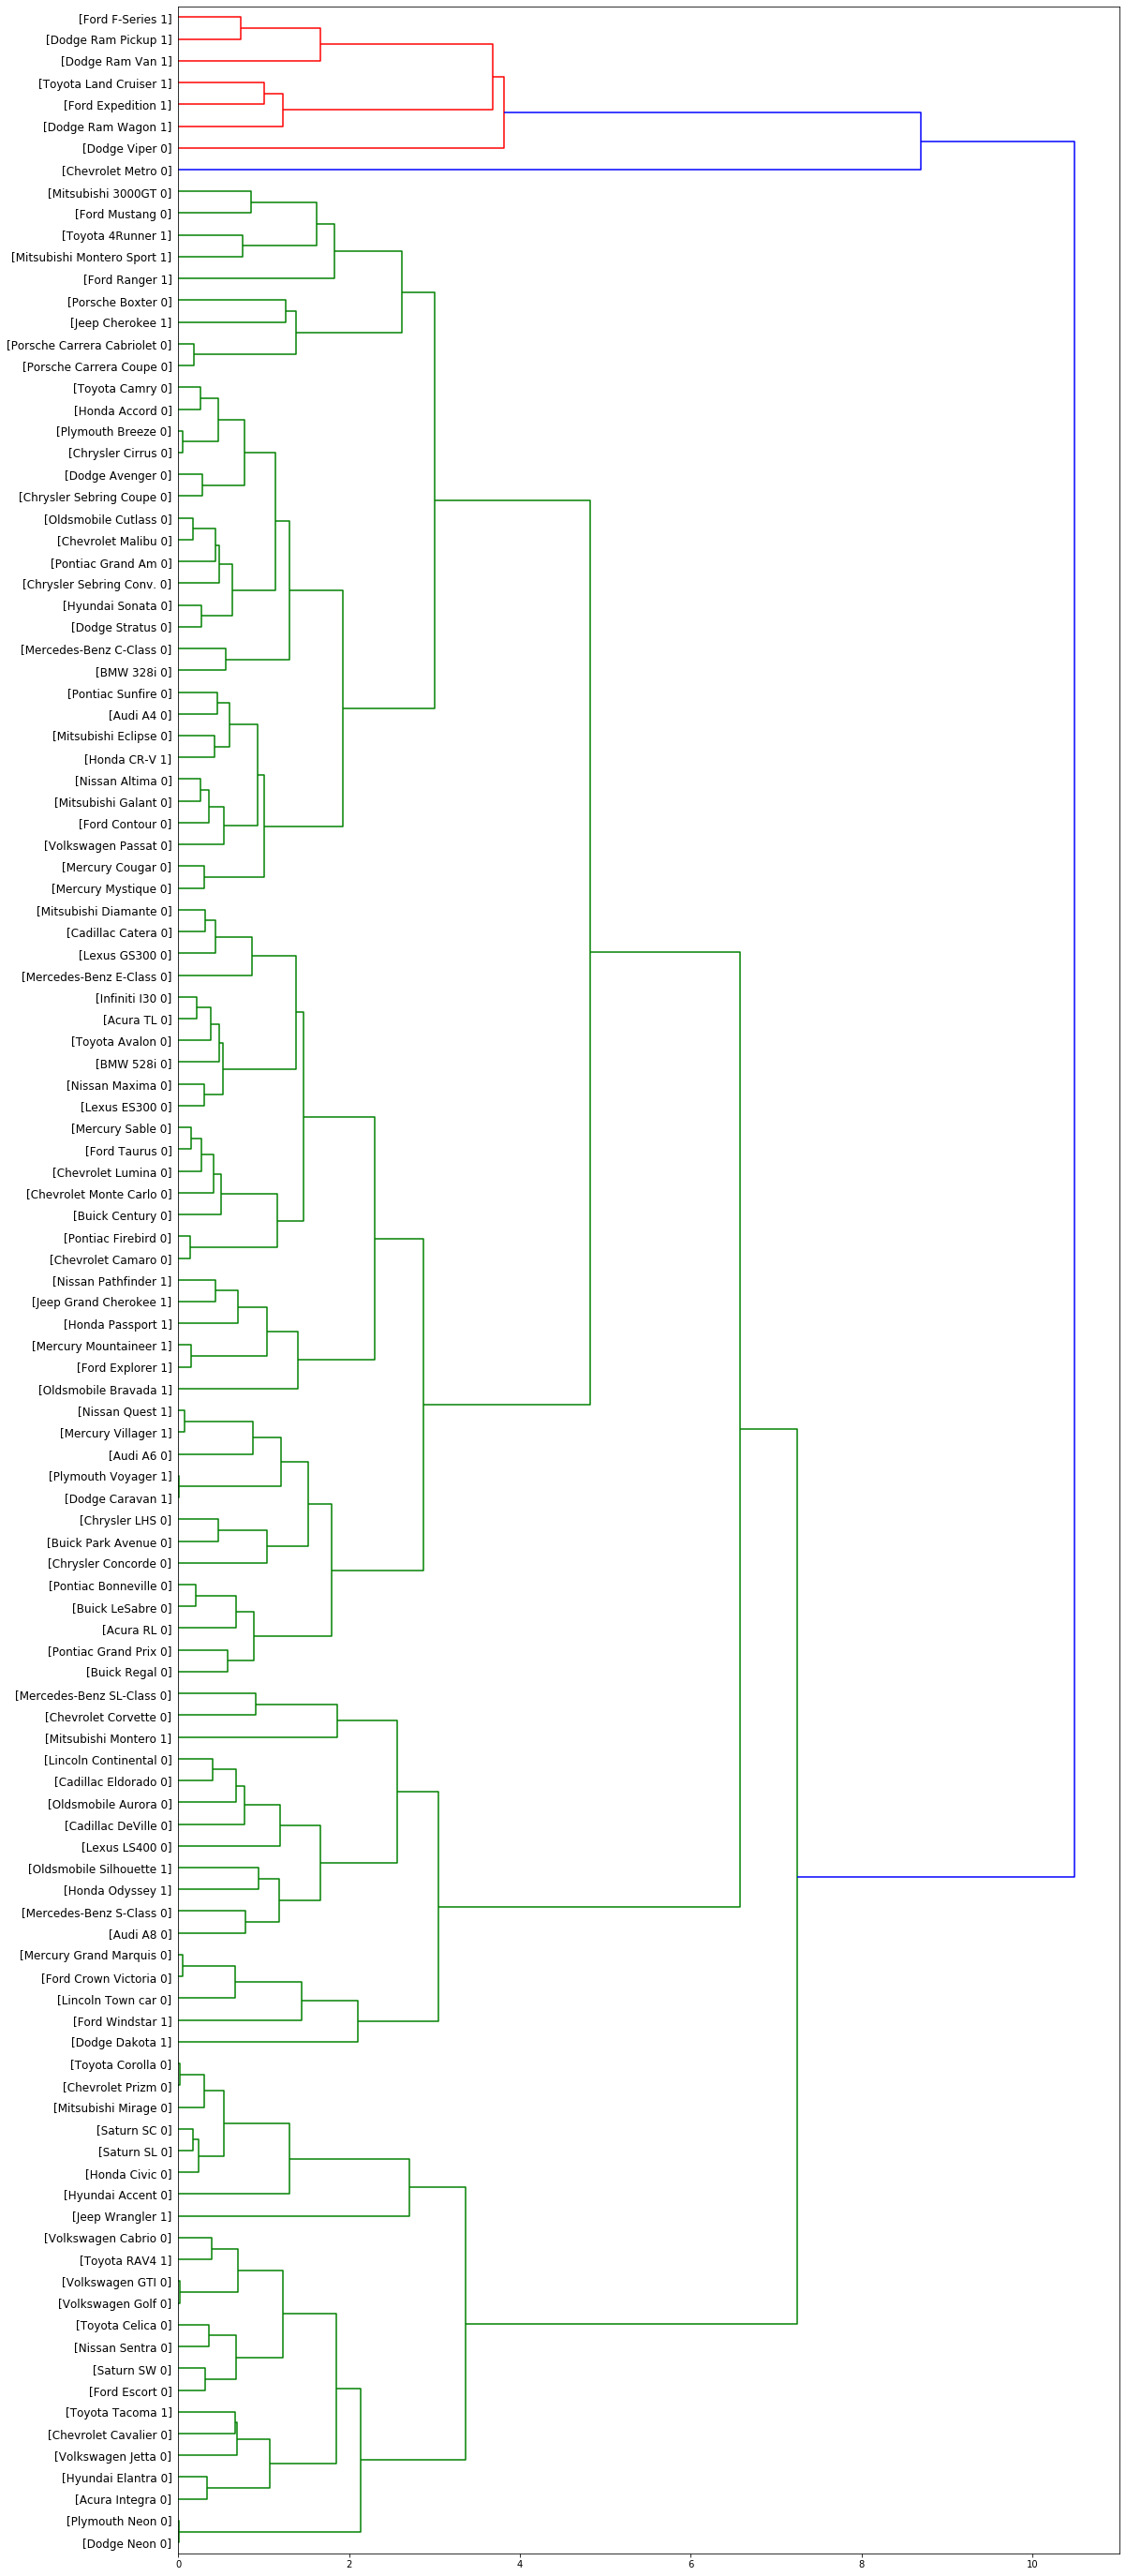

In [20]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

<h2 id="clustering_using_skl">Кластеризация с использованием scikit-learn</h2>
Повторим еще раз, но на этот раз с помощью пакета scikit-learn:

In [21]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


Теперь мы можем использовать функцию AgglomerativeClustering из библиотеки scikit-learn для кластеризации набора данных. AgglomerativeClustering выполняет иерархическую кластеризацию, используя подход «снизу вверх». Критерий связи определяет показатель, используемый для стратегии слияния:

- Ward минимизирует сумму квадратов различий во всех кластерах. Это подход, минимизирующий дисперсию, и в этом смысле он аналогичен целевой функции k-средних, но решается с помощью агломерационного иерархического подхода.
- Максимальная или полная связь минимизирует максимальное расстояние между наблюдениями пар скоплений.
- Средняя связь минимизирует среднее расстояние между всеми наблюдениями пар скоплений.

In [22]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1], dtype=int64)

И мы можем добавить новое поле в наш фрейм данных, чтобы показать кластер каждой строки:

In [23]:
pdf['cluster_'] = agglom.labels_
pdf.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0   

   cluster_  
0         1  
1         2  
2         2  
3         1  
4         2

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

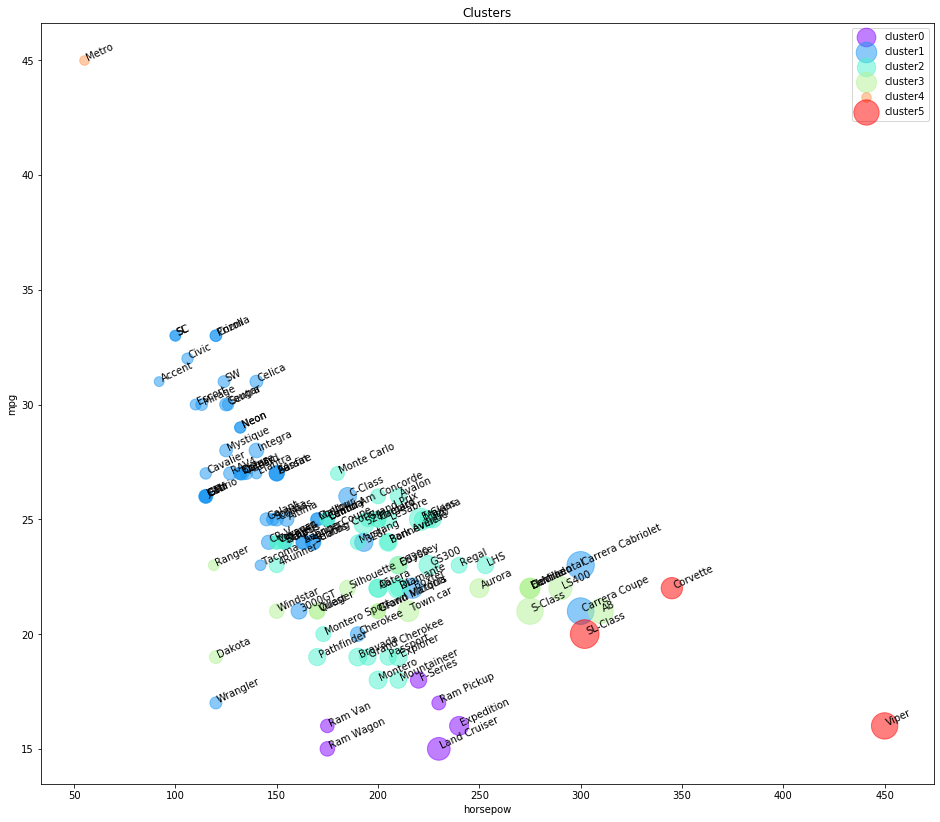

In [24]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Как вы можете видеть, мы видим распределение каждого кластера, используя график рассеяния, но не очень ясно, где находится центроид каждого кластера. Кроме того, в нашем наборе данных есть 2 типа транспортных средств: «грузовик» (значение 1 в столбце типа) и «автомобиль» (значение 1 в столбце типа). Итак, мы используем их, чтобы различать классы и обобщать кластер. Сначала посчитаем количество случаев в каждой группе:

In [25]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

Теперь мы можем посмотреть на характеристики каждого кластера:

In [26]:
agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000


Очевидно, что у нас есть 3 основных кластера с большинством транспортных средств в них.

__Машины__:
- Кластер 1: с высоким расходом и низкой мощностью.
- Кластер 2: с хорошим расходом и мощностью, но цена выше средней.
- Кластер 3: с низким расходом, высокой мощностью, самая высокая цена.
    
    
    
__Грузовики__:
- Кластер 1: почти самая высокий расход среди грузовиков, и самая низкая мощность и цена.
- Кластер 2: с почти низким расходом и средней мощностью, но более высокой ценой, чем в среднем.
- Кластер 3: с хорошим расходом и мощностью, низкая цена.


Обратите внимание, что мы не использовали __type__ и __price__ автомобилей в процессе кластеризации, но иерархическая кластеризация могла бы создать кластеры и выделить их с достаточно высокой точностью.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

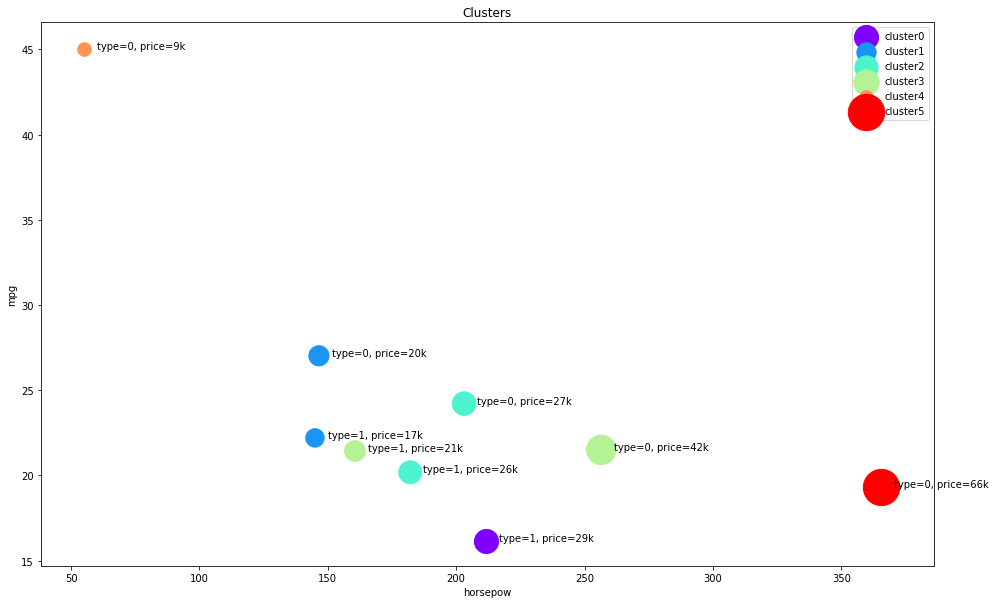

In [27]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
